

1.  S20170010105 - PSVN Bhavani Shankar
2.  S20170020230 - Pavan Kumar Anand

1.  S20170010138 - Hemanth Sanisetty

1.  S20170020241 - Somana Venkata Sai Krishna Rupesh










In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.figure_factory  as ff 
import os
import datetime
import seaborn as sns
from plotly.figure_factory import create_scatterplotmatrix
import plotly.graph_objects as go

In [ ]:
data = pd.read_excel('/content/drive/My Drive/sdaproj/AirQualityUCI.xlsx')

In [ ]:
data.head()

Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]

In [ ]:
data.describe()

CO(GT)  PT08.S1(CO)  ...          dCO           dT
count  9357.000000  9357.000000  ...  9356.000000  9356.000000
mean      2.082195  1102.604396  ...     0.000043    -0.001593
std       1.469801   219.599578  ...     0.753861     1.407775
min       0.100000   647.250000  ...    -5.100000    -9.699999
25%       1.000000   938.250000  ...    -0.200000    -0.625000
50%       1.700000  1061.500000  ...     0.000000     0.100000
75%       2.800000  1237.250000  ...     0.300000     0.800000
max      11.900000  2039.750000  ...     5.100000    17.275000

[8 rows x 15 columns]

In [ ]:
data.mean()
data = data.replace( -200 , np.nan )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
data = data.dropna(how="all")
data.head()
data = data.fillna(method = 'ffill')

In [ ]:
data.drop('NMHC(GT)', axis=1, inplace=True)
data['CO(GT)'].replace(to_replace= -200, value= 0, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.1+ MB


In [ ]:
#scatter plot 

fig = px.scatter(data, x="Time",y="CO(GT)",range_y = [0,15], color = "CO(GT)", template = 'plotly_white', marginal_y="box")
fig.update_layout(title_text='True hourly averaged concentration of CO(mg/m^3) at different hours of a day', title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['CO(GT)']], ['CO(GT)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of True hourly averaged concentration of CO(mg/m^3)', title_x=0.5)
fig.show()

In [ ]:
data['PT08.S1(CO)'].replace(to_replace= -200, value= 800, inplace= True)
fig = px.scatter(data, x="Time",y="PT08.S1(CO)",template = 'plotly_white', color = "PT08.S1(CO)", marginal_y="box")
fig.update_layout(title_text="PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) at various times of Day", title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['PT08.S1(CO)']], ['PT08.S1(CO)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)', title_x=0.5, yaxis=dict(range=[0,0.0035]))
fig.show()

In [ ]:
data['C6H6(GT)'].replace(to_replace= -200, value= 0, inplace= True)
fig = px.scatter(data, x="Time",y="C6H6(GT)",template = 'plotly_white', color = "C6H6(GT)", marginal_y="box")
fig.update_layout(title_text="Benzene hourly averaged sensor response at different hours of Day", title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['C6H6(GT)']], ['C6H6(GT)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of Benzene hourly averaged sensor response', title_x=0.5)
fig.show()

In [ ]:
data['PT08.S2(NMHC)'].replace(to_replace= -200, value= 650, inplace= True)
fig = px.scatter(data, x="Time",y="PT08.S2(NMHC)",template = 'plotly_white', color = "PT08.S2(NMHC)",  marginal_y="box")
fig.update_layout(title_text="PT08.S2(Titania) averaged sensor response (targetted at NHMC) at different hours of Day", title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['PT08.S2(NMHC)']], ['PT08.S2(NMHC)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of PT08.S2(NMHC) hourly averaged sensor response (normally targetted at NHMC)', title_x=0.5, yaxis=dict(range=[0,0.003]))
fig.show()

In [ ]:
data['NOx(GT)'].replace(to_replace= -200, value= 150, inplace= True)
fig = px.density_heatmap(data, x='Date', y='NOx(GT)',  marginal_y="box")
fig.update_layout(title_text='NOx', title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['NOx(GT)']], ['NOx(GT)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of NOx(GT) hourly averaged sensor response', title_x=0.5, yaxis=dict(range=[0,0.005]))
fig.show()

In [ ]:
# NO2(GT)
data['NO2(GT)'].replace(to_replace= -200, value= 0, inplace= True)
fig = px.density_heatmap(data, x='Date', y='NO2(GT)',  marginal_y="box")
fig.update_layout(title_text='NO2', title_x=0.5)
fig.show()

In [ ]:
fig = ff.create_distplot([data['NO2(GT)']], ['NO2(GT)'], colors= ['rgb(0, 0, 100)'])
fig.update_layout(title_text='Distibution of NO2(GT) hourly averaged sensor response', title_x=0.5, yaxis=dict(range=[0,0.01]))
fig.show()

In [ ]:
data['T'].replace(to_replace= -200, value= 25, inplace= True)
data['RH'].replace(to_replace= -200, value= 50, inplace= True)
fig = px.scatter(data, x="T",y="RH",template = 'plotly_white',labels={
                     "T": "Temperature in Celsius",
                     "RH": "Relative Humidity",
                 },)
fig.update_layout(title_text="Relative Humidity vs Temperature in Celsius", title_x=0.5)
fig.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



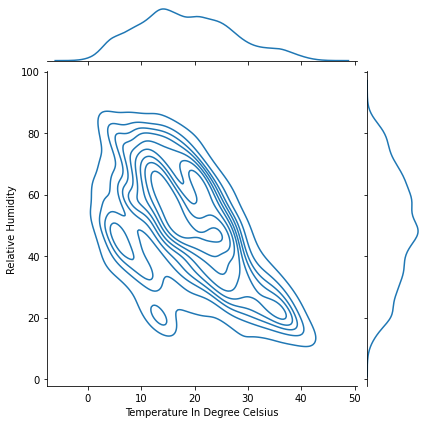

In [ ]:
sns.jointplot("T", "RH", data=data,kind= "kde").set_axis_labels("Temperature In Degree Celsius", "Relative Humidity")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



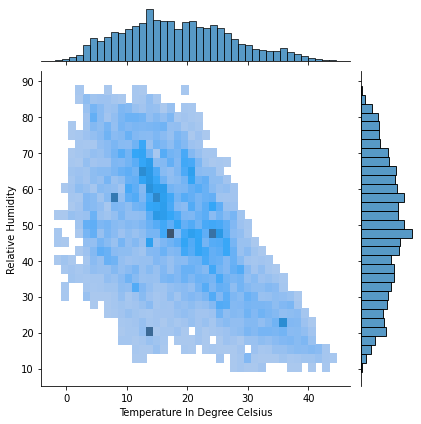

In [ ]:
a=sns.jointplot("T", "RH", data= data,kind="hist").set_axis_labels("Temperature In Degree Celsius", "Relative Humidity")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



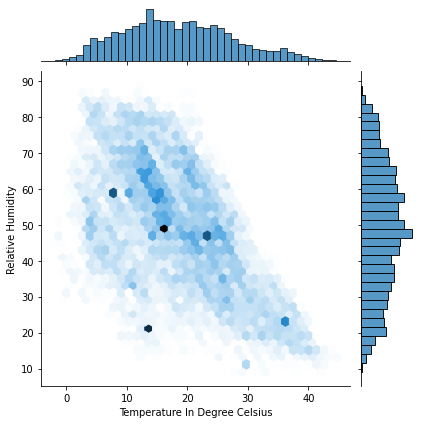

In [ ]:
a=sns.jointplot("T", "RH", data= data,kind="hex").set_axis_labels("Temperature In Degree Celsius", "Relative Humidity")

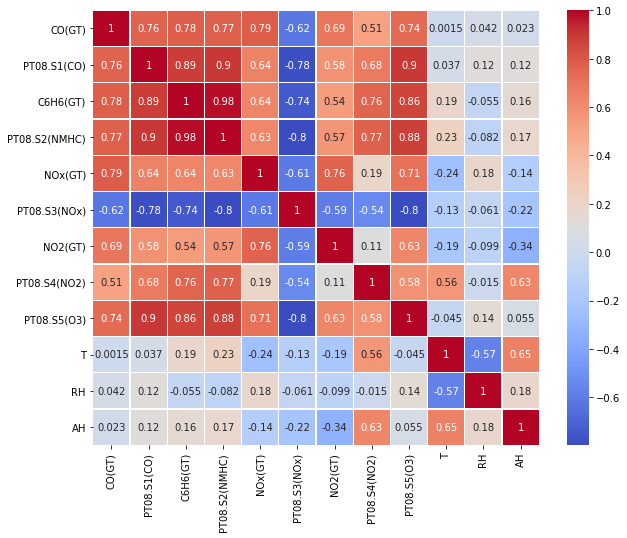

In [ ]:
# d = data.drop(['PT08.S1(CO)','PT08.S3(NOx)','PT08.S4(NO2)'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.20,  cmap='coolwarm')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe729d55fd0>,
      dtype=object)

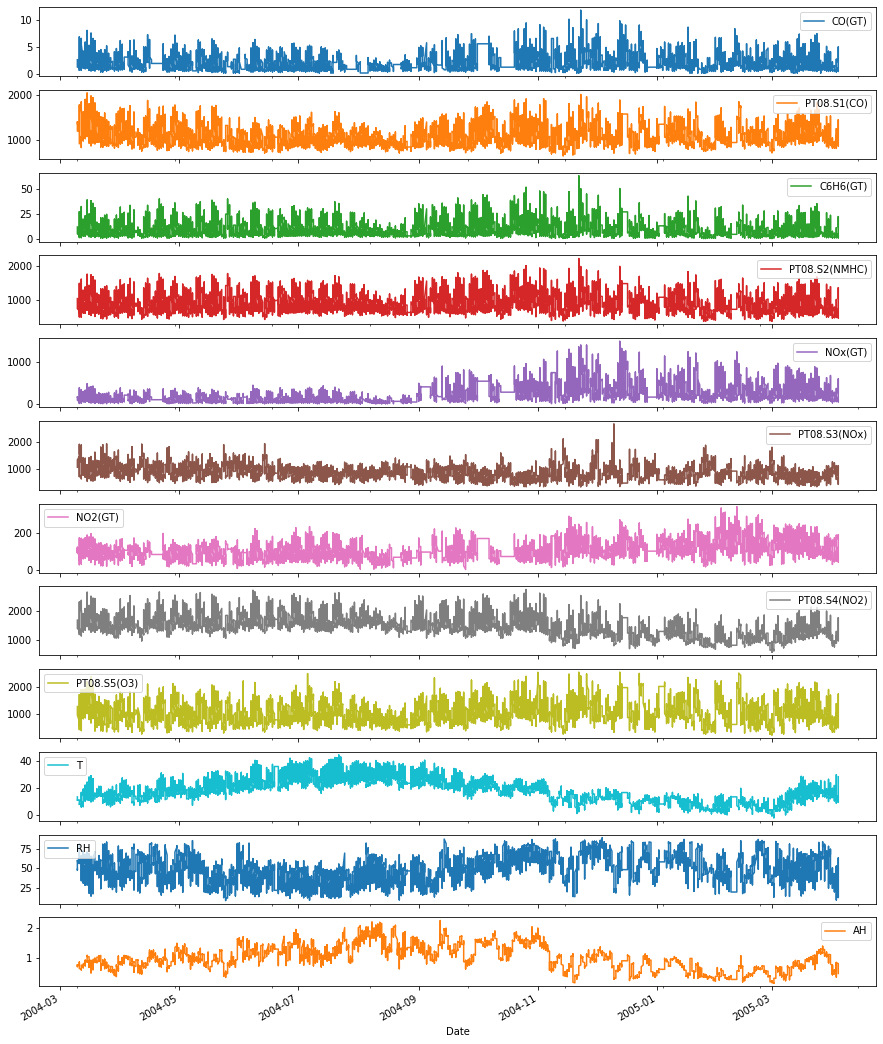

In [ ]:
data.plot(x="Date",figsize=(15,20),subplots = True)

In [ ]:
data['DateTime'] = data['Date'].astype('str')+' '+data['Time'].astype('str')
data['DateTime'] = pd.to_datetime(data['DateTime'].astype('str'),format = "%Y/%m/%d %H:%M:%S")

# plt.title('Distribution of RH across the year')


In [ ]:
year = list(map(lambda x : x.year,data['DateTime']))
data['year'] = pd.DataFrame(year)
data['YearMonth'] = data.DateTime.dt.to_period('m')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
 15  year           9357 n

Text(0.5, 1.0, 'Increase or Decrease of temparature across months')

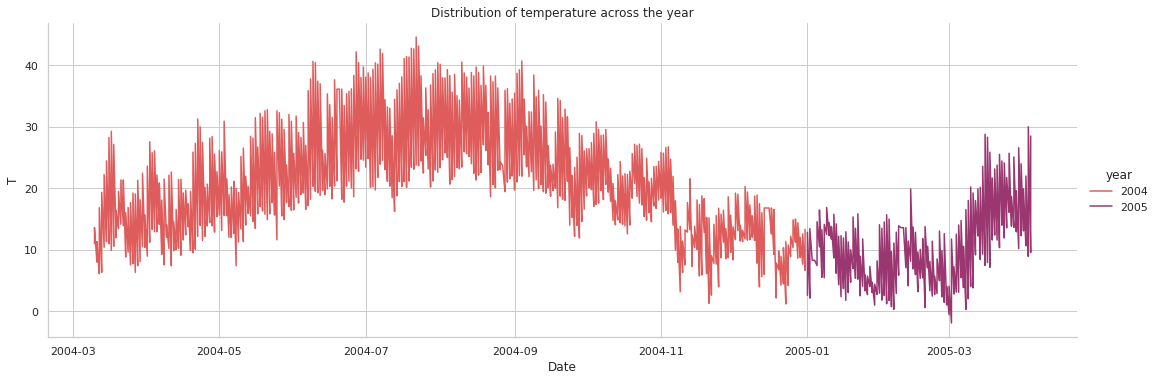

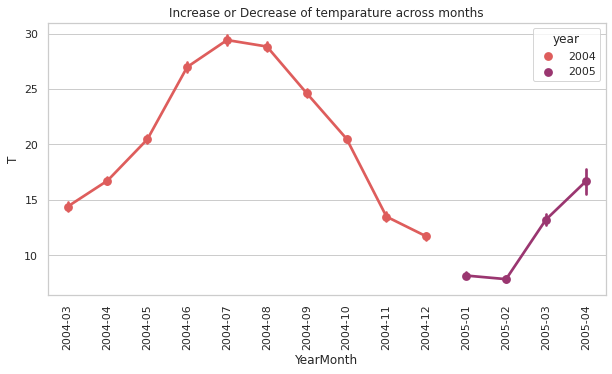

In [ ]:
sns.relplot(x = "Date",y="T",kind="line",estimator = None,hue = "year",palette=sns.color_palette("flare",n_colors = 2),data = data,height = 5,aspect = 3)
plt.title('Distribution of temperature across the year')

plt.figure(figsize=(10,5))
sns.pointplot(x = "YearMonth", y= "T", kind = "line", palette=sns.color_palette("flare",n_colors = 2),hue = "year",data=data)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of temparature across months")


Text(0.5, 1.0, 'Increase or Decrease of Concentration of RH across months')

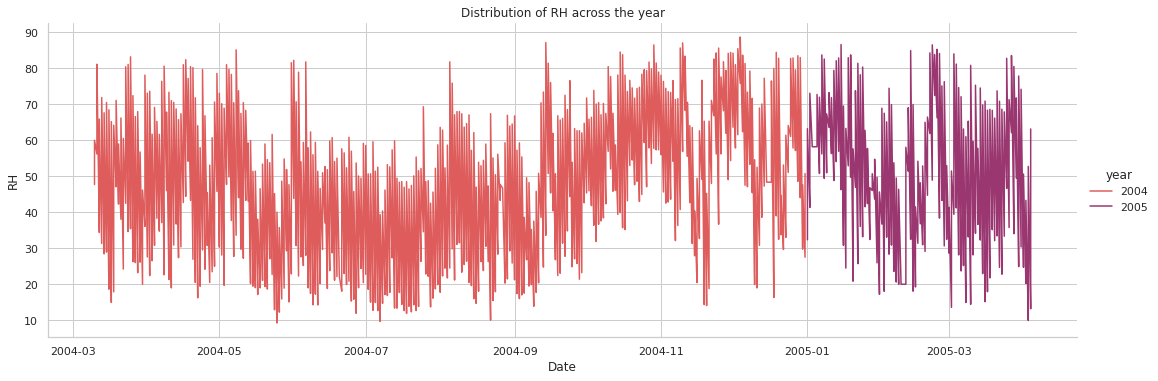

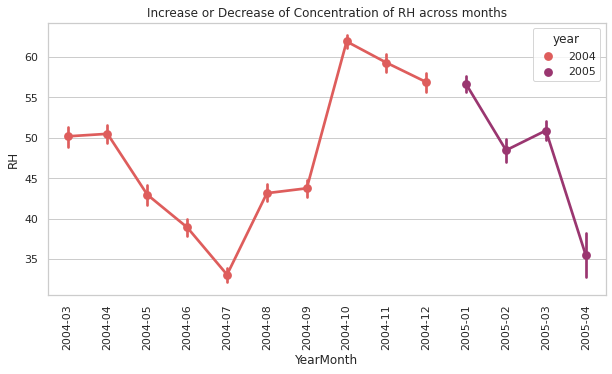

In [ ]:
sns.relplot(x = "Date",y="RH",kind="line",estimator = None,hue = "year",palette=sns.color_palette("flare",n_colors = 2),data = data,height = 5,aspect = 3)
plt.title('Distribution of RH across the year')

plt.figure(figsize=(10,5))
sns.pointplot(x = "YearMonth", y= "RH", kind = "line", palette=sns.color_palette("flare",n_colors = 2),hue = "year",data=data)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of Concentration of RH across months")


Text(0.5, 1.0, 'Increase or Decrease of conc of AH across months')

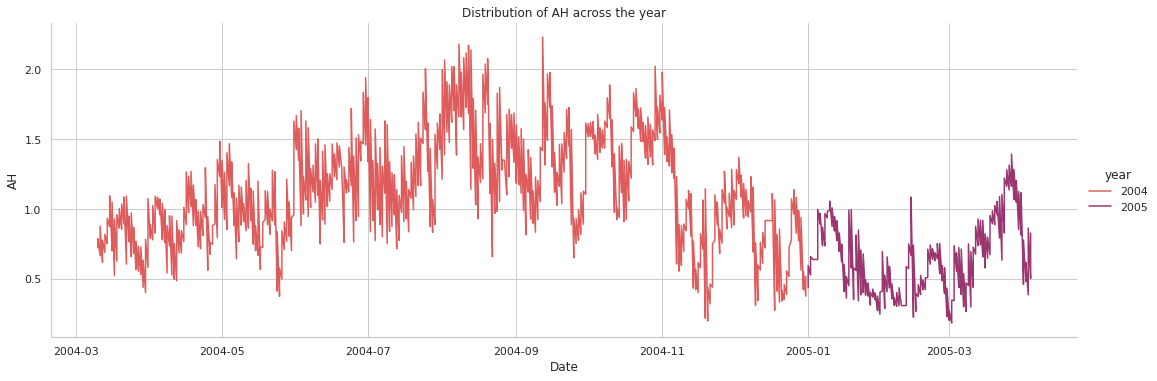

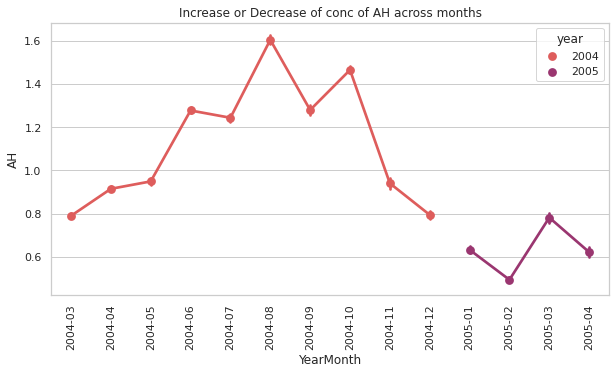

In [ ]:
sns.relplot(x = "Date",y="AH",kind="line",estimator = None,hue = "year",palette=sns.color_palette("flare",n_colors = 2),data = data,height = 5,aspect = 3)
plt.title('Distribution of AH across the year')

plt.figure(figsize=(10,5))
sns.pointplot(x = "YearMonth", y= "AH", kind = "line", palette=sns.color_palette("flare",n_colors = 2),hue = "year",data=data)
plt.xticks(rotation =90)
plt.title("Increase or Decrease of conc of AH across months")

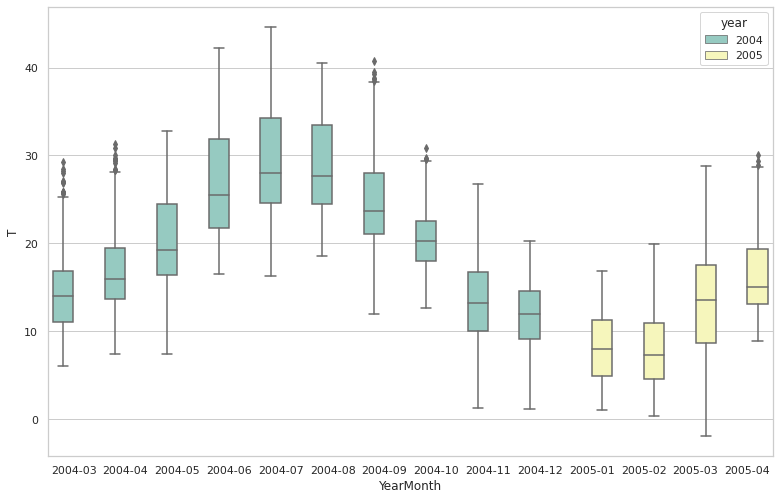

In [ ]:
sns.set(rc={'figure.figsize':(13,8.27)})
sns.set_theme(style="whitegrid")
sns.boxplot(x="YearMonth", y="T", hue="year", palette="Set3", data=data)

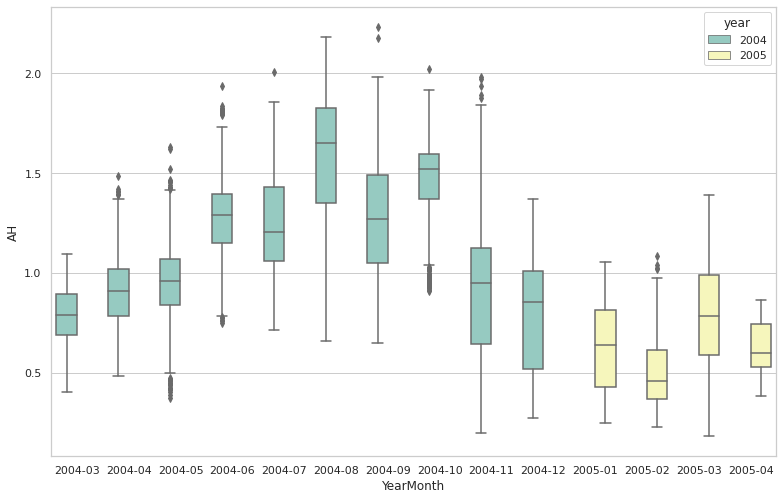

In [ ]:
sns.boxplot(x="YearMonth", y="AH", hue="year", data=data, palette="Set3")

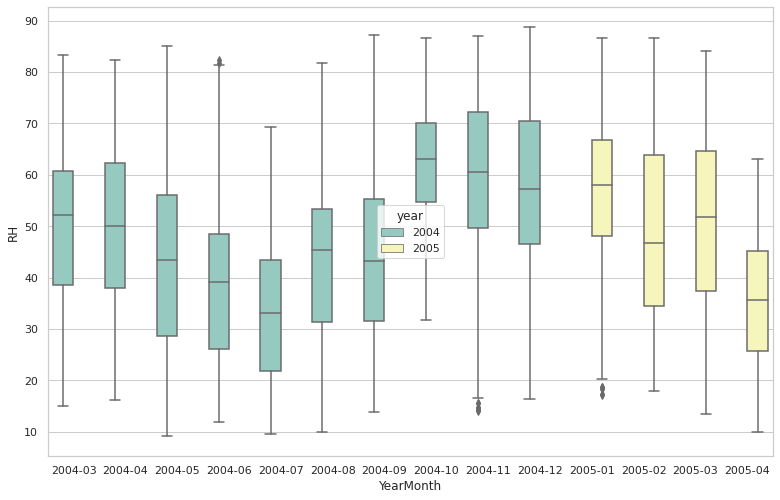

In [ ]:
sns.boxplot(x="YearMonth", y="RH", hue="year", data=data, palette="Set3")

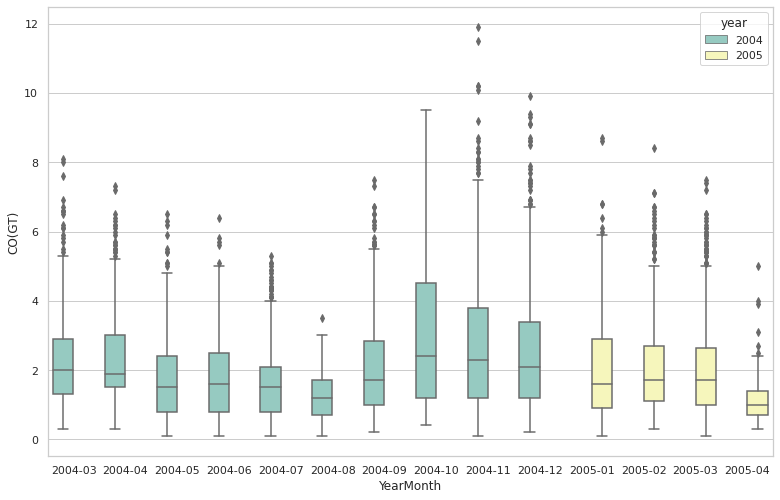

In [ ]:
sns.boxplot(x="YearMonth", y="CO(GT)", hue="year", data=data, palette="Set3")

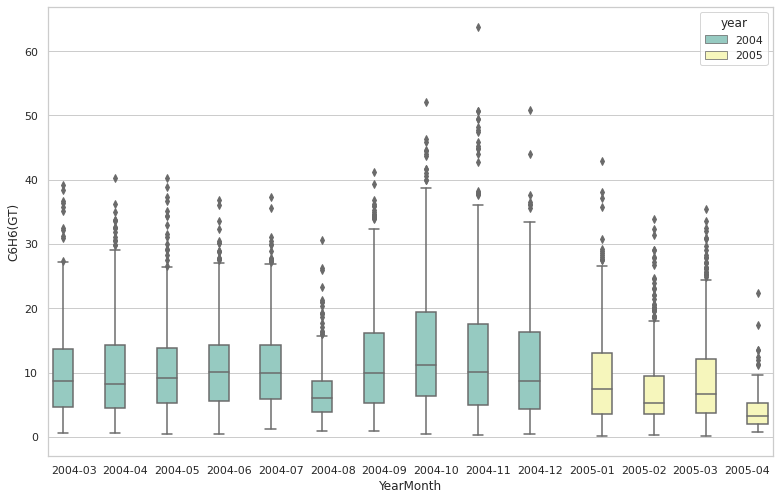

In [ ]:
sns.boxplot(x="YearMonth", y="C6H6(GT)", hue="year", data=data, palette='Set3')

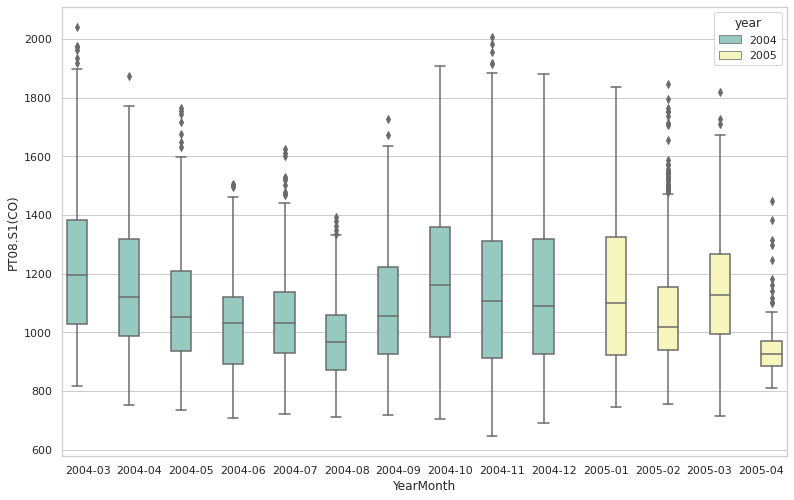

In [ ]:
sns.boxplot(x="YearMonth", y="PT08.S2(NHMC)", hue="year", data=data, palette='Set3')

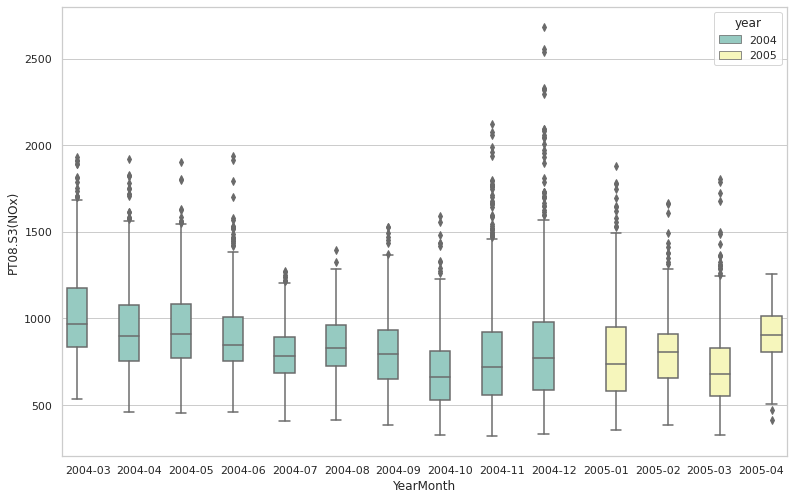

In [ ]:
sns.boxplot(x="YearMonth", y="PT08.S3(NOx)", hue="year", data=data, palette='Set3')

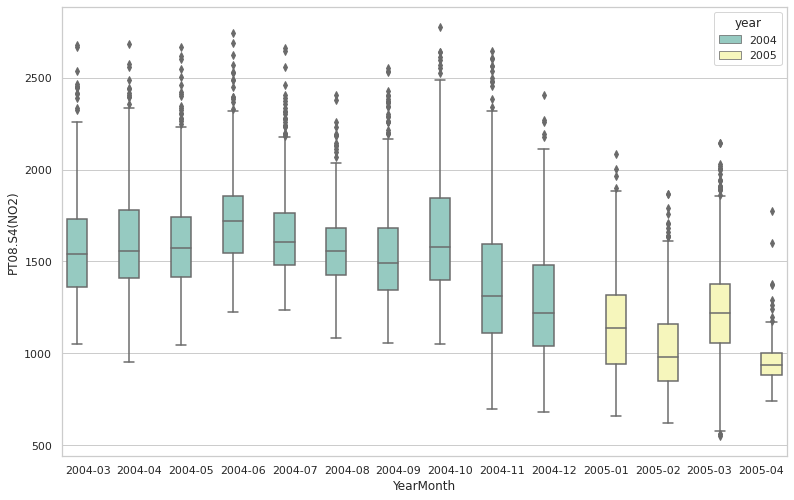

In [ ]:
sns.boxplot(x="YearMonth", y="PT08.S4(NO2)", hue="year", data=data, palette='Set3')

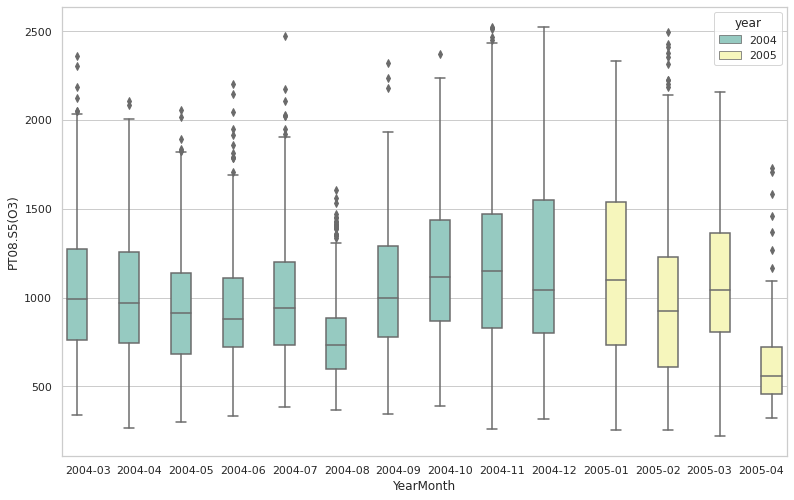

In [ ]:
sns.boxplot(x="YearMonth", y="PT08.S5(O3)", hue="year", data=data, palette='Set3')

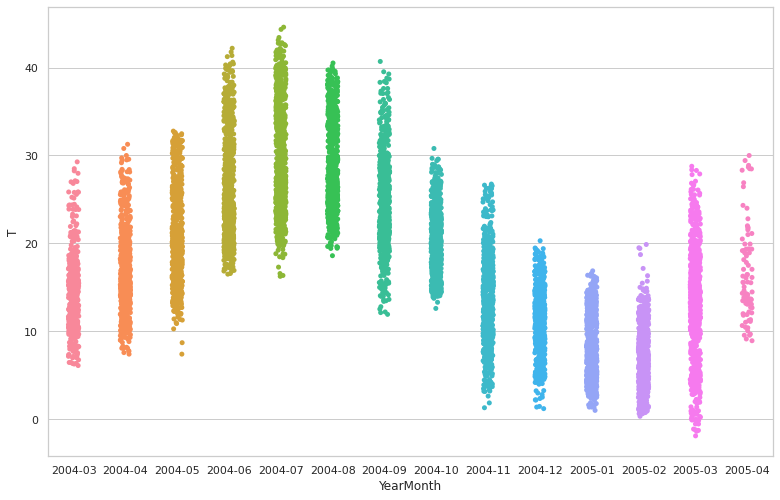

In [ ]:
sns.stripplot(x="YearMonth", y="T", data=data, jitter =True)

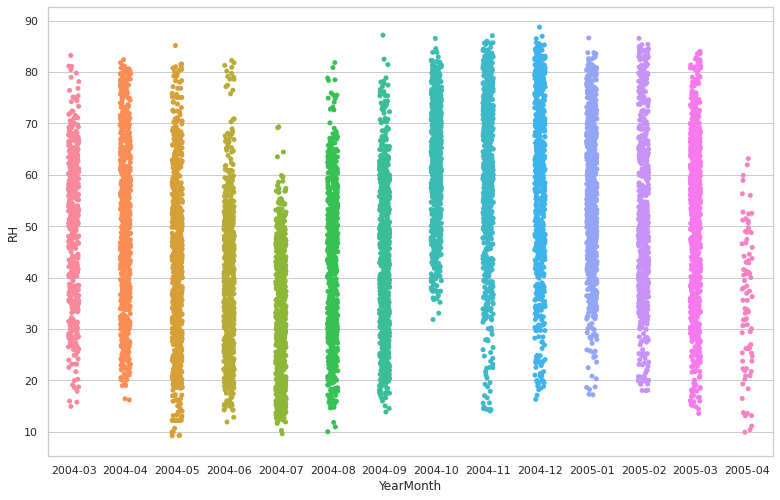

In [ ]:
sns.stripplot(x="YearMonth", y="RH", data=data, jitter =True)

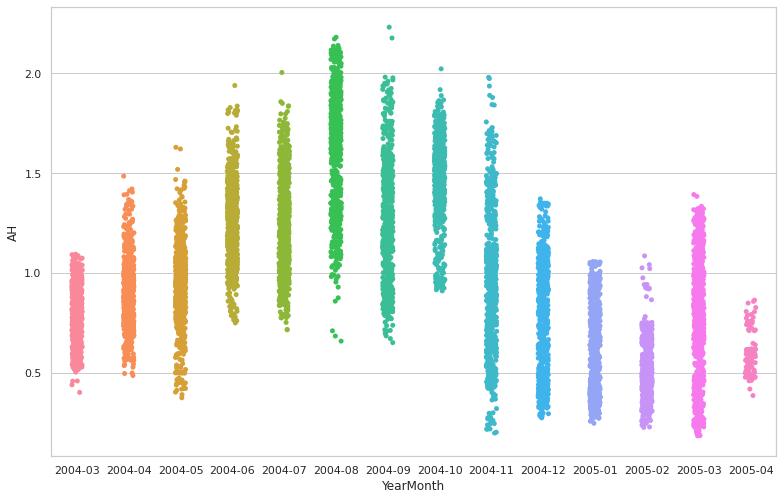

In [ ]:
sns.stripplot(x="YearMonth", y="AH", data=data, jitter =True)

In [ ]:
data['dCO'] = data['CO(GT)'] - data['CO(GT)'].shift(-1)
data['dT'] = data['T'] - data['T'].shift(-1)

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.stripplot(x="dT", y="dCO", data=data, jitter = True)

ValueError: ignored